## Pipeline K-Nearest Neighbors(KNN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
df = pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


### Train|Test Split and Scaling Data

In [ ]:
from sklearn.model_selection import train_test_split

In [3]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<IPython.core.display.Javascript object>

### Pipeline

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [6]:
scaler = StandardScaler()

In [7]:
knn =  KNeighborsClassifier(n_neighbors=1)

In [9]:
operations = [("scaler", scaler), ("knn", knn)]

In [10]:
Pipeline(steps=operations)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

In [11]:
pipe = Pipeline(operations)

In [12]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

In [13]:
y_pred = pipe.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

### Model Performance on Classification Tasks

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

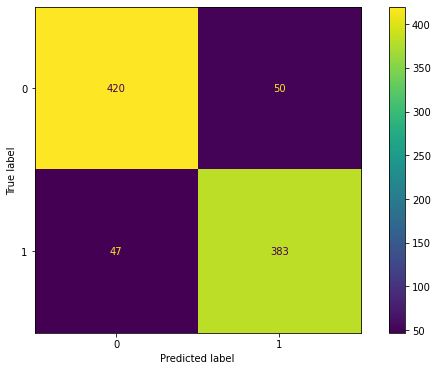

In [15]:
plot_confusion_matrix(pipe, X_test, y_test);

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



### Elbow Method for Choosing Reasonable K Values with Pipeline

In [17]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [18]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [19]:
pipe.set_params(knn__n_neighbors=2)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=2))])

In [20]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=2))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=2),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 2,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [21]:
test_error_rates = []
for k in range(1,30):
    pipe.set_params(knn__n_neighbors = k)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    test_error = 1 - f1_score(y_test, y_pred)
    test_error_rates.append(test_error)

In [22]:
test_error_rates = []
for k in range(1,30):
    pipe.set_params(knn__n_neighbors = k)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    test_error = 1 - f1_score(y_test, y_pred)
    test_error_rates.append(test_error)

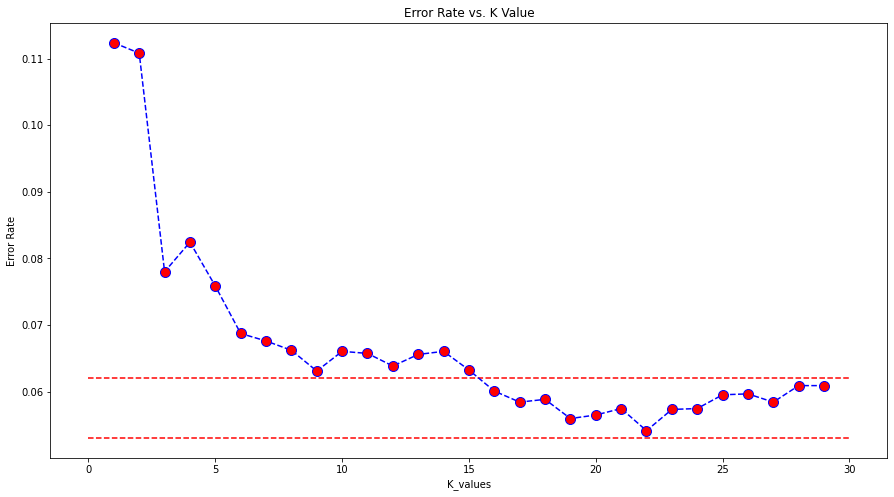

In [28]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.053, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.062, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
# plt.hlines(y=0.065, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [23]:
# K=9
pipe.set_params(knn__n_neighbors = 9)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print('WITH K=9')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=9


[[445  25]
 [ 29 401]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



### Cross Validate on Pipeline

In [24]:
from sklearn.model_selection import cross_val_score, cross_validate

In [25]:
model = pipe.set_params(knn__n_neighbors = 9)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.004314,0.008007,0.919048,0.924528,0.915888,0.920188
2,0.003002,0.008008,0.947619,0.944444,0.953271,0.948837
3,0.003003,0.008007,0.947619,0.970588,0.925234,0.947368
4,0.003003,0.007006,0.866667,0.876190,0.859813,0.867925
5,0.003003,0.007007,0.923810,0.909910,0.943925,0.926606
6,0.004004,0.007006,0.909524,0.915094,0.906542,0.910798
7,0.003002,0.007006,0.933333,0.911504,0.962617,0.936364
8,0.003001,0.007008,0.938095,0.927273,0.953271,0.940092
9,0.003002,0.007006,0.966667,0.980769,0.953271,0.966825
10,0.003003,0.007007,0.895238,0.869565,0.934579,0.900901


In [26]:
df_scores.mean()[2:]

test_accuracy     0.924762
test_precision    0.922987
test_recall       0.930841
test_f1           0.926590
dtype: float64

### GridSearch on Pipeline

In [30]:
from sklearn.model_selection import GridSearchCV

In [32]:
k_values = range(1,30)

In [33]:
param_grid = {'knn__n_neighbors': k_values}

In [34]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=9))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=9),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 9,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [35]:
pipe_grid = GridSearchCV(pipe, param_grid, cv=10, scoring= 'accuracy')

In [36]:
pipe_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=9))]),
             param_grid={'knn__n_neighbors': range(1, 30)}, scoring='accuracy')

In [37]:
pipe_grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=21))])

In [38]:
pipe_grid.best_estimator_.get_params() # Bu değerleri hesaba katmalıyız.

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=21))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=21),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 21,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [40]:
pipe_grid.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=9))],
 'estimator__verbose': False,
 'estimator__scaler': StandardScaler(),
 'estimator__knn': KNeighborsClassifier(n_neighbors=9),
 'estimator__scaler__copy': True,
 'estimator__scaler__with_mean': True,
 'estimator__scaler__with_std': True,
 'estimator__knn__algorithm': 'auto',
 'estimator__knn__leaf_size': 30,
 'estimator__knn__metric': 'minkowski',
 'estimator__knn__metric_params': None,
 'estimator__knn__n_jobs': None,
 'estimator__knn__n_neighbors': 9,
 'estimator__knn__p': 2,
 'estimator__knn__weights': 'uniform',
 'estimator': Pipeline(steps=[('scaler', StandardScaler()),
                 ('knn', KNeighborsClassifier(n_neighbors=9))]),
 'n_jobs': None,
 'param_grid': {'knn__n_neighbors': range(1, 30)},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}

In [41]:
pd.DataFrame(pipe_grid.cv_results_).iloc[:,4:].head()

,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1,{'knn__n_neighbors': 1},0.904762,0.909524,0.909524,0.857143,0.909524,0.885714,0.909524,0.909524,0.923810,0.895238,0.901429,0.017567,28
1,2,{'knn__n_neighbors': 2},0.900000,0.904762,0.909524,0.880952,0.919048,0.900000,0.876190,0.923810,0.904762,0.895238,0.901429,0.014134,28
2,3,{'knn__n_neighbors': 3},0.914286,0.933333,0.947619,0.866667,0.914286,0.900000,0.923810,0.919048,0.938095,0.904762,0.916190,0.021634,26
3,4,{'knn__n_neighbors': 4},0.904762,0.928571,0.942857,0.866667,0.914286,0.890476,0.900000,0.928571,0.914286,0.900000,0.909048,0.020696,27
4,5,{'knn__n_neighbors': 5},0.923810,0.938095,0.947619,0.871429,0.928571,0.909524,0.928571,0.933333,0.952381,0.900000,0.923333,0.022882,19


In [42]:
list(pipe_grid.cv_results_.keys())

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_knn__n_neighbors',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'split8_test_score',
 'split9_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score']

In [43]:
pipe_grid.cv_results_['mean_test_score']

array([0.90142857, 0.90142857, 0.91619048, 0.90904762, 0.92333333,
       0.92      , 0.9247619 , 0.92380952, 0.9247619 , 0.92238095,
       0.92142857, 0.92142857, 0.92238095, 0.92190476, 0.9247619 ,
       0.9247619 , 0.92714286, 0.92571429, 0.92666667, 0.93      ,
       0.93047619, 0.92619048, 0.92857143, 0.92809524, 0.92809524,
       0.92809524, 0.92761905, 0.92857143, 0.92904762])

In [44]:
pipe_grid.cv_results_['std_test_score']

array([0.01756749, 0.01413412, 0.02163394, 0.02069649, 0.02288193,
       0.02454114, 0.02472525, 0.02380952, 0.02750386, 0.02617315,
       0.0280306 , 0.02762315, 0.02744196, 0.02794553, 0.02700466,
       0.0270885 , 0.02390931, 0.02467016, 0.02601238, 0.02685731,
       0.02609941, 0.02687419, 0.02428105, 0.02680661, 0.0249671 ,
       0.02487611, 0.02407471, 0.02361828, 0.02366144])

### Final Model and Model Deployment

### Predict New Observations